In [4]:
import pandas as pd


list_questions = pd.read_csv("data/ListQuestions.csv").to_numpy()
# print(list_questions)

class_questions = pd.read_csv('data/Careers.csv').to_numpy()
class_questions[0]


array([4, 'Tôi có thể vận hành, điều khiển các máy móc thiết bị', 'R',
       'Cơ khí & Xây dựng: Kỹ sư cơ khí, chế tạo máy, luyện kim, điện lạnh, xây dựng, giao thông, thủy lợi, trắc địa, mỏ, địa chất, dầu khí, vận tải, hàng hải.\nĐiện, điện tử: Kỹ sư điện, điện tử, phần cứng máy tính, viễn thông, tự động hóa.'],
      dtype=object)

In [27]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# Auto-membership function population is possible with .automf(3, 5, or 7)
quality.automf(3)
service.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tip['low'] = fuzz.trimf(tip.universe, [0, 5, 15])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [10, 20, 25])

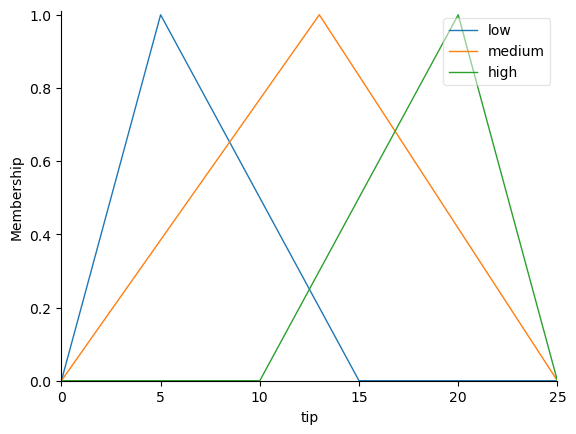

In [28]:
# You can see how these look with .view()
tip.view()

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

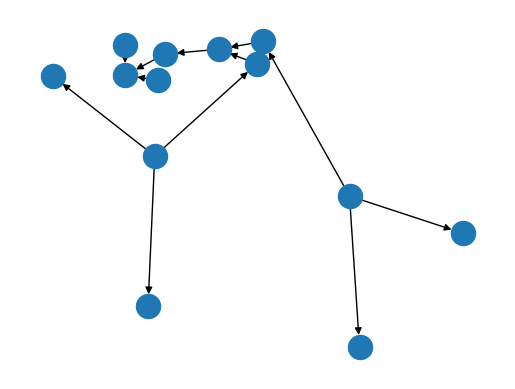

In [38]:
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

rule1.view()

In [31]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

In [32]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [33]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8

# Crunch the numbers
tipping.compute()

In [34]:
tipping.output['tip']
# tip.view(sim=tipping)

17.659246353322523

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
mean = ctrl.Antecedent(np.arange(0, 101, 1), 'mean')
character = ctrl.Antecedent(np.arange(0, 101, 1), 'character')

cmd = ctrl.Consequent(np.arange(0,11,1), 'cmd')

In [3]:
character['verylow'] = fuzz.trapmf(character.universe, [0, 0, 10, 25])
character['low'] = fuzz.trapmf(character.universe, [15, 25, 30, 45])
character['medium'] = fuzz.trapmf(character.universe, [35, 45, 50, 65])
character['high'] = fuzz.trapmf(character.universe, [50, 70, 75, 85])
character['veryhigh'] = fuzz.trapmf(character.universe, [75, 85, 100, 100])

mean['verylow'] = fuzz.trapmf(mean.universe, [0, 0, 15, 25])
mean['low'] = fuzz.trapmf(mean.universe, [15, 25, 30, 40])
mean['medium'] = fuzz.trapmf(mean.universe, [30, 40, 45, 55])
mean['high'] = fuzz.trapmf(mean.universe, [45, 55, 65, 75])
mean['veryhigh'] = fuzz.trapmf(mean.universe, [60, 75, 100, 100])

cmd['no'] = fuzz.trapmf(cmd.universe, [0, 0, 3, 6])
cmd['yes'] = fuzz.trapmf(cmd.universe, [4, 7, 10, 10])


D:\KHDL\Anaconda3\envs\newenvt\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


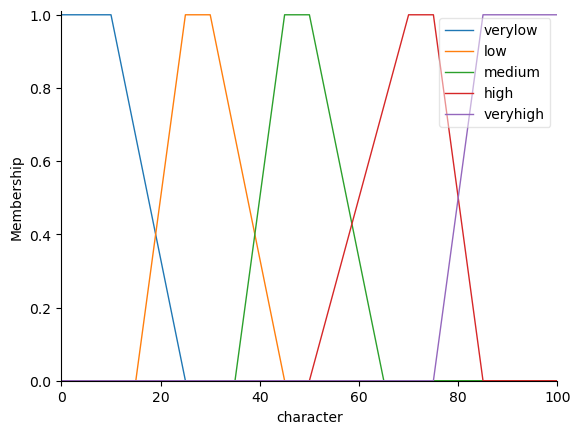

In [4]:
character.view()

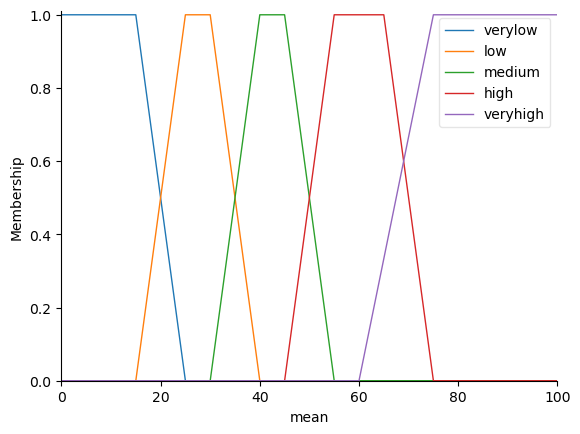

In [5]:
mean.view()

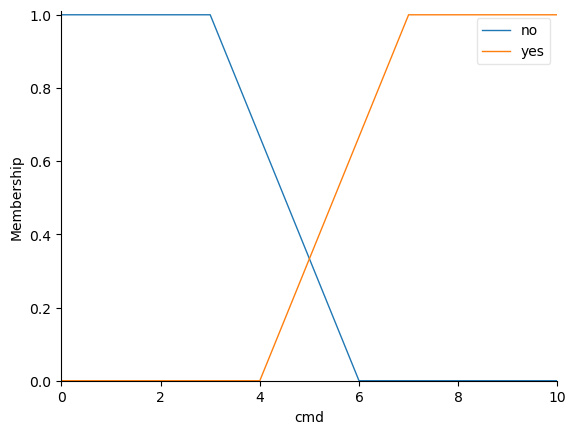

In [6]:
cmd.view()

In [7]:
rule1 = ctrl.Rule(
    character['high'] | 
    character['veryhigh'] | 
    mean['verylow'] | 
    mean['low'] | 
    (mean['medium'] & character['medium']), cmd['yes'])
rule2 = ctrl.Rule(
    (mean['medium'] & character['verylow']) |
    (mean['medium'] & character['low']) |
    (mean['high'] & character['verylow']) |  
    (mean['high'] & character['low']) |
    (mean['veryhigh'] & character['medium']) |
    (mean['veryhigh'] & character['verylow']) |
    (mean['veryhigh'] & character['low']), cmd['no'])


In [8]:
cmd_ctrl = ctrl.ControlSystem([rule1, rule2])
cmd_op = ctrl.ControlSystemSimulation(cmd_ctrl)

In [24]:
cmd_op.input['mean'] = 52
cmd_op.input['character'] = 38

cmd_op.compute()
cmd_op.output['cmd']

4.457483289741355

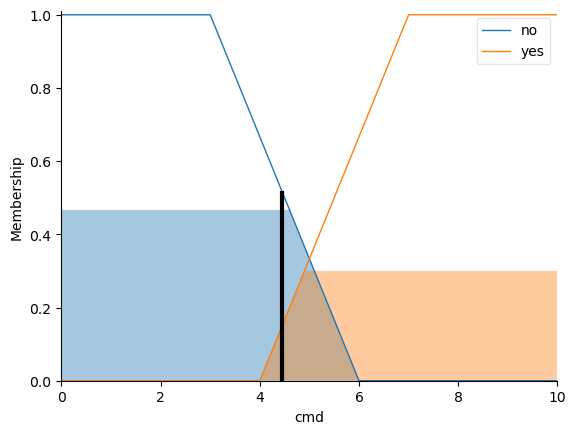

In [25]:
cmd.view(sim=cmd_op)

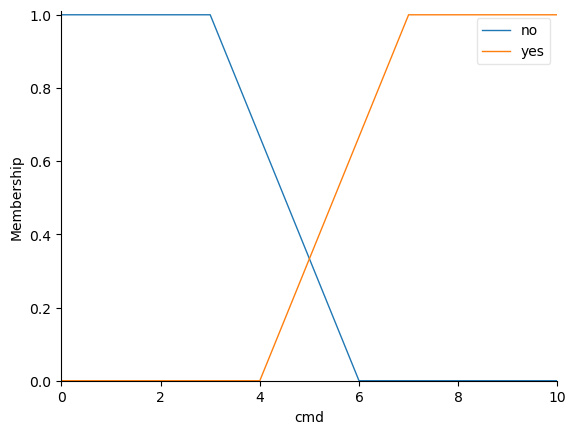